(chap-geographic-maps)=
# Geographic maps

```{contents} Sections
:local:
:depth: 1
```

## Projections


```{div} full-width
Let us import the main python libraries
```

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import cartopy

In [2]:
%matplotlib inline
np.set_printoptions(precision=1)
import warnings
warnings.filterwarnings("ignore")

```{div} full-width
Using the submodule `cartopy.crs` we can setup the geodetic projection where points are indetified by longitude and latitude
```

In [3]:
geodetic = cartopy.crs.Geodetic()

```{div} full-width
or define a different projection as, for instant, the azimuthal equidistant one with respect to a specified geographic point
```

In [4]:
lon0 = 13
lat0 = 42.5
projection = cartopy.crs.AzimuthalEquidistant(central_longitude=lon0, central_latitude=lat0)

```{div} full-width
Then, we can create a matplotlib subplot with the optional argument `subplot_kw=dict(projection=projection)` to make a geographic map, set the geographic extent in geodetic coordinates, draw the gridlines, the coastlines and the state border as well
```

In [5]:
def setup_map(projection, extent):

    fig,ax = plt.subplots(tight_layout=True, figsize=(8,8), subplot_kw=dict(projection=projection, transform=projection))
    ax.set_extent(extent)

    ax.coastlines()
    ax.add_feature(cartopy.feature.BORDERS,color="gray");

    gl = ax.gridlines(draw_labels=True)
    gl.top_labels, gl.left_labels = False, False
    
    return fig

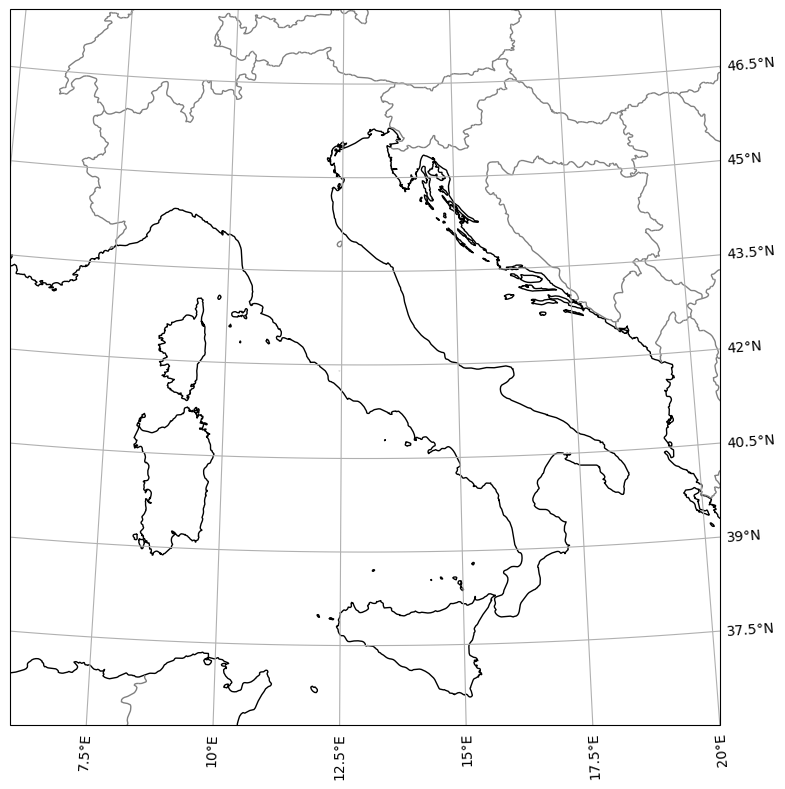

In [6]:
extent = [6,20,36,47.5]
fig = setup_map(projection, extent)

## Coordinate transformation

```{div} full-width
Let us now define a numpy array collecting the longitudes, latitudes and elevations (in meters) of four geographic points
```

In [7]:
lle =np.array([[lon0,lat0,0],[15,43.5,-200],[17.5,39,1600],[10,45,2000]]).T
print("Geodetic:\n")
print("longitude:",lle[0],"[deg]")
print("latitude: ",lle[1],"[deg]")
print("elevation:",lle[2]/1e3,"[km]")

Geodetic:

longitude: [13.  15.  17.5 10. ] [deg]
latitude:  [42.5 43.5 39.  45. ] [deg]
elevation: [ 0.  -0.2  1.6  2. ] [km]


```{div} full-width
and make use of the method `transfom_points` to get the Cartesian coordinates in the Azimuthal equidistant projection
```

In [8]:
xyz = projection.transform_points(geodetic, *lle).T
print("Azimuthal equidistant:\n")
print("x:",xyz[0]/1e3,"[km]")
print("y:",xyz[1]/1e3,"[km]")
print("z:",xyz[2]/1e3,"[km]")

Azimuthal equidistant:

x: [   0.   161.7  389.9 -236.6] [km]
y: [   0.   113.  -378.6  282. ] [km]
z: [ 0.  -0.2  1.6  2. ] [km]


```{div} full-width
Then, we remake the geographic maps and plot the points 
```

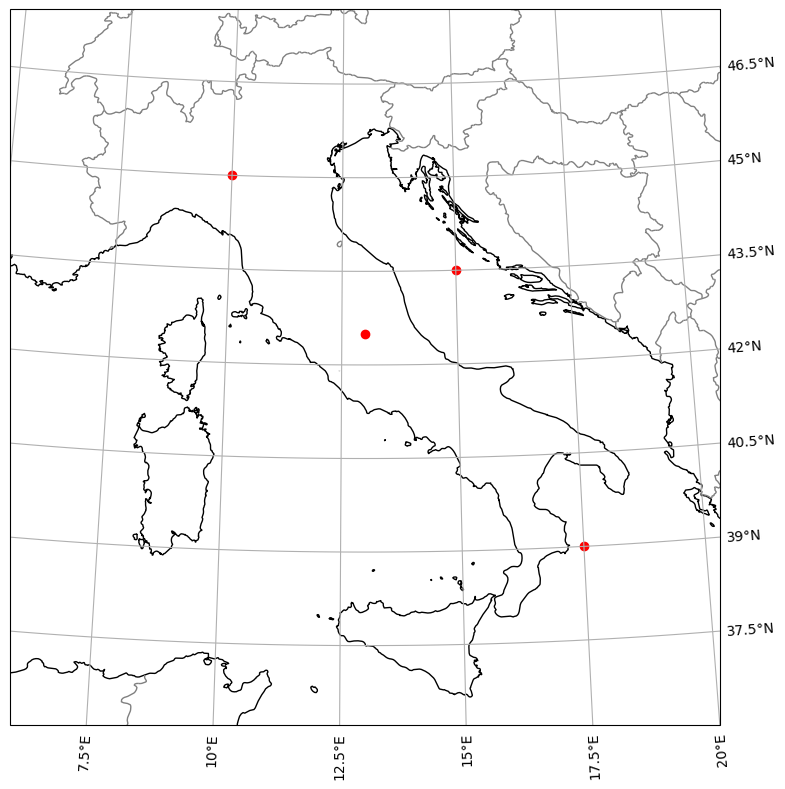

In [9]:
fig = setup_map(projection, extent)
ax = fig.gca()
ax.scatter(*xyz[:2], color="red");

```{div} full-width
The same results can be obtained providing the Geodetic coordinates `lles` and using the optional argument `transform=cartopy.crs.PlateCarree()`
```

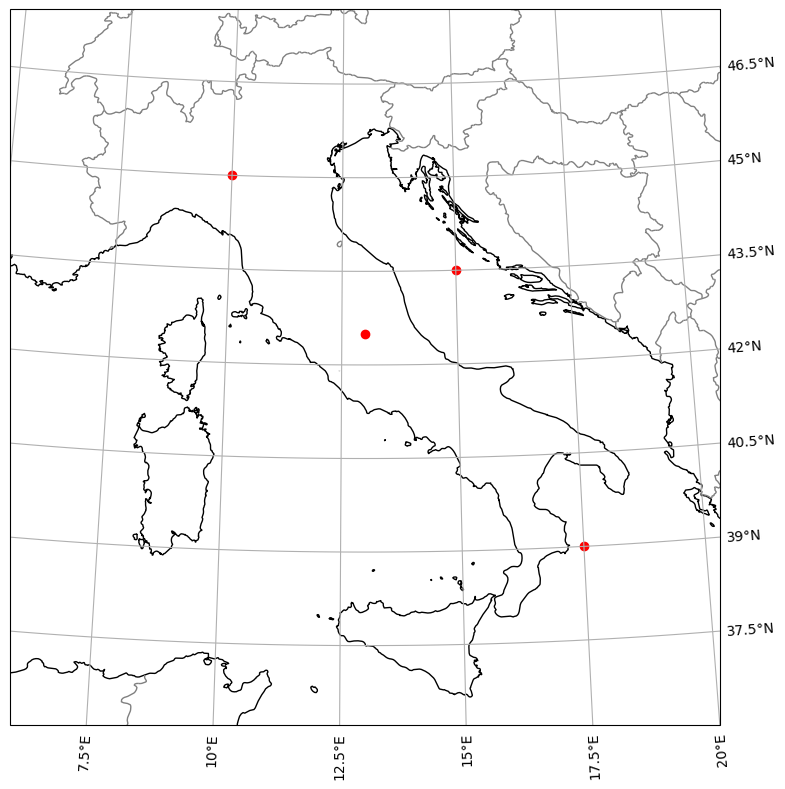

In [10]:
fig = setup_map(projection,extent)
ax = fig.gca()
ax.scatter(*lle[:2], color="red", transform=cartopy.crs.PlateCarree());

## Local library `lab`

```{div} full-width
To speed up the data visualization on geographic maps, the local library `lab` has the function `setup_map` that makes most of the initial setting for making a geographical map
```

In [11]:
from lab import setup_map
help(setup_map)

Help on function setup_map in module lab:

setup_map(circle=None, extent=None, color=None, label=None, scale=1.1)
    
    Return a Figure object with a geoaxes object from cartopy as axis.
    
    Parameters:
    -----------
    circle:   dictionary with keywords "longitude" and "latitude" used as 
              the centre of the map and "maxradius" as the radius [in degrees] 
              of the circle that must be contained in it.
    scale:    float that is used to scale the map extent [1.1 by default].
    extent:   array-like with min and max longitudes and min and max latitudes
              that is used to set the extent instead of the one derived from circle.
              If neither circle or extent are provided, the extent will be global.
    color:    color used to draw the circle and its centre [by default the circle is not drawn]
    label:    used for annotate the circle centre
    
    Return:
    -------
    fig:      the Figure object



```{div} full-width
Here a few examples of its usage
```

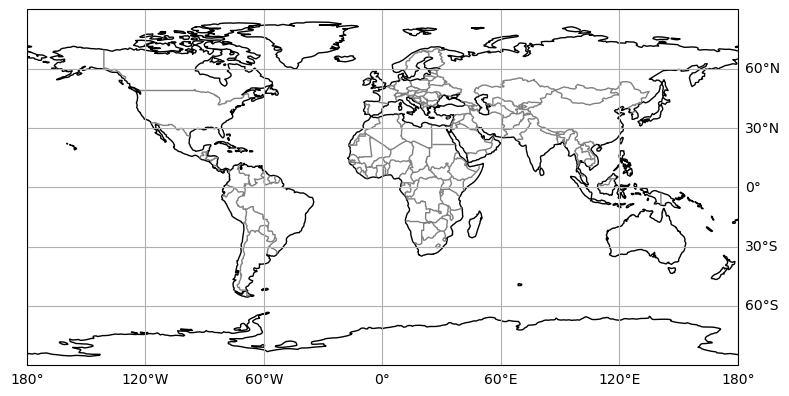

In [12]:
fig = setup_map()

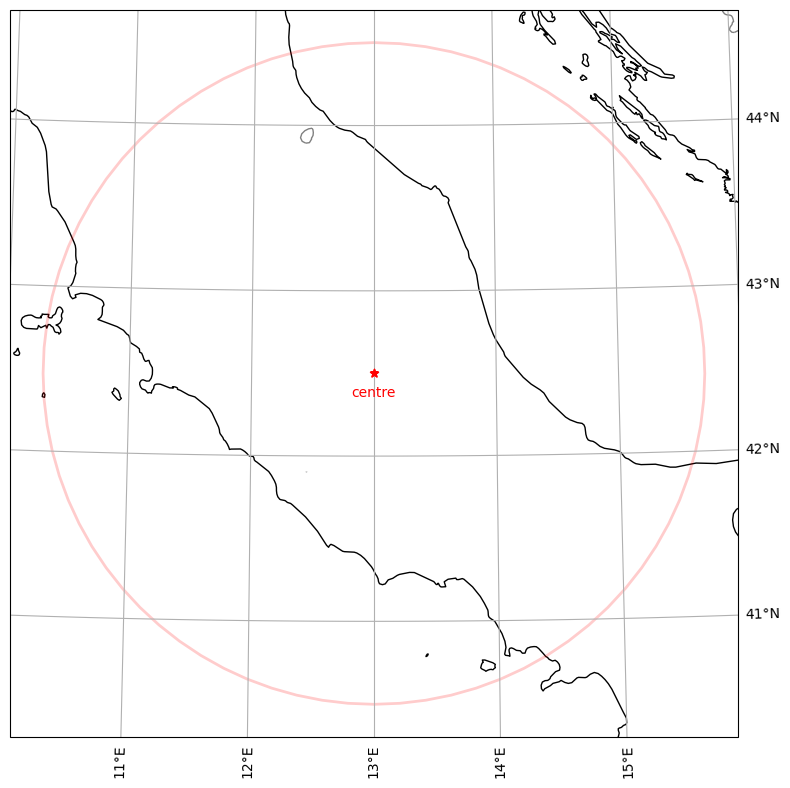

In [13]:
circle = dict(maxradius=2, longitude=13, latitude=42.5)
fig = setup_map(circle=circle, color="red", label="centre")

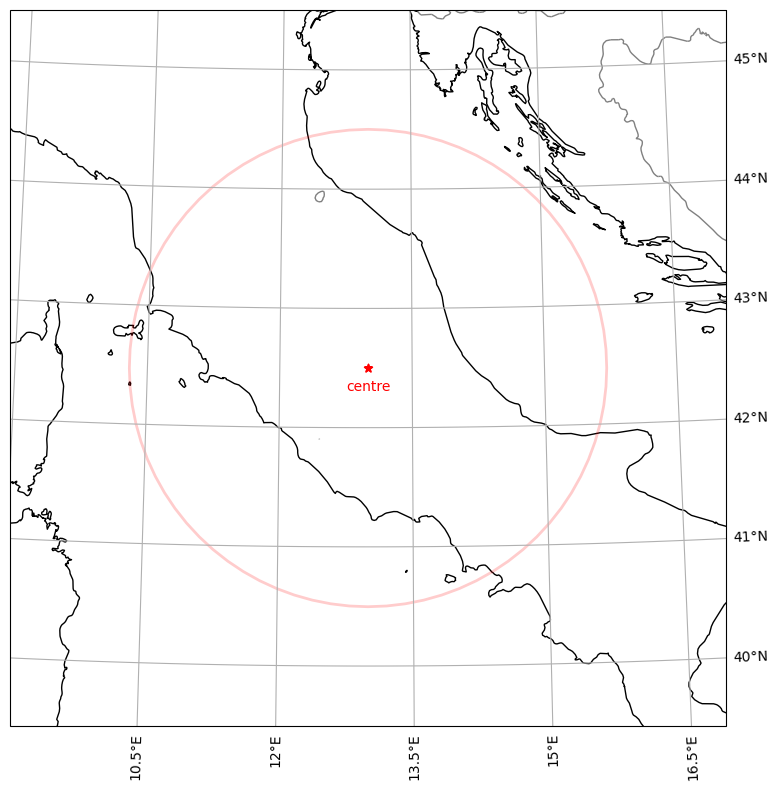

In [14]:
circle = dict(maxradius=2, longitude=13, latitude=42.5)
fig = setup_map(circle=circle, color="red", label="centre", scale=1.5)

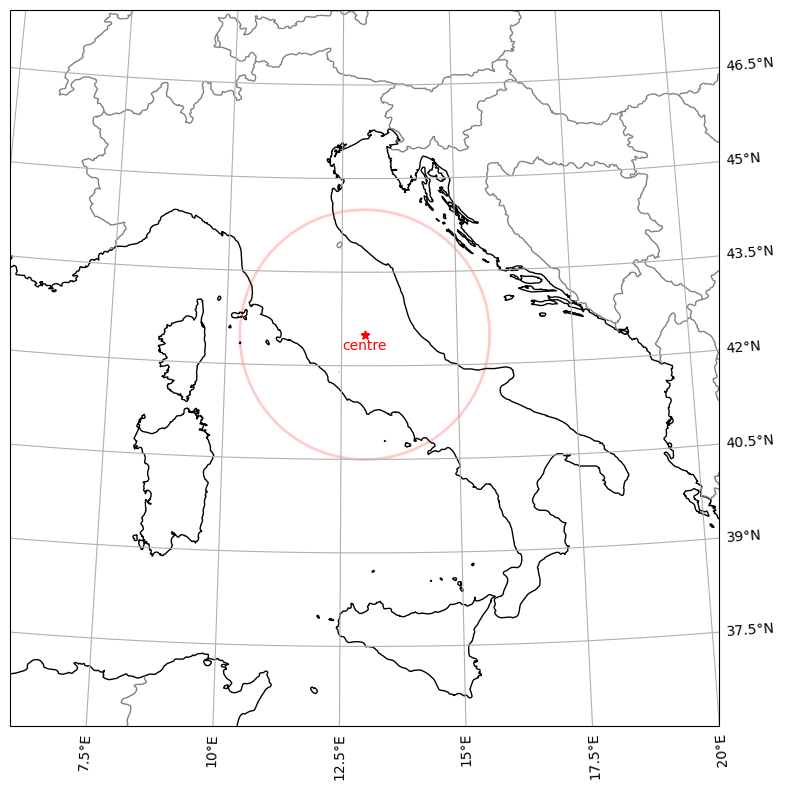

In [15]:
fig = setup_map(extent=extent, circle=circle, color="red", label="centre")

<p style="page-break-after:always;"></p>